# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## General steps:
### I. Data Exploration and Data Visualization
### II. Data Preprocessing and Data Visualization
### III. Train the Model and Evaluate the Model
### IV. Optimize the Model
### V. Conclusions

In [135]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [137]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [138]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [139]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# I. Data Exploration and Data Visualization

## I.1 portfolio.json
Containing offer ids and meta data about each offer (duration, type, etc.)

In [140]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [141]:
portfolio.shape

(10, 6)

In [142]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [143]:
# Check null values
portfolio.isnull().sum()

,0
reward,0
channels,0
difficulty,0
duration,0
offer_type,0
id,0


In [144]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [145]:
portfolio.groupby('offer_type')['id'].count()

,id
offer_type,
bogo,4
discount,4
informational,2


In [146]:
portfolio['channels']

,channels
0,"[email, mobile, social]"
1,"[web, email, mobile, social]"
2,"[web, email, mobile]"
3,"[web, email, mobile]"
4,"[web, email]"
5,"[web, email, mobile, social]"
6,"[web, email, mobile, social]"
7,"[email, mobile, social]"
8,"[web, email, mobile, social]"
9,"[web, email, mobile]"


The channels column has multivalue so we need to separate it.

### Data cleaning

In [147]:
# Use get_dummies to split the values ​​in the 'channels' column
channels_dummies = portfolio['channels'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
offer_types = pd.get_dummies(portfolio['offer_type'], prefix='offer').astype(int)
df_portfolio = portfolio.copy()
df_portfolio = pd.concat([df_portfolio, offer_types, channels_dummies], axis=1)
df_portfolio = df_portfolio.drop(columns=['channels', 'offer_type'])
df_portfolio = df_portfolio.rename(columns={'id': 'offer_id'})
df_portfolio

,reward,difficulty,duration,offer_id,offer_bogo,offer_discount,offer_informational,email,mobile,social,web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,1.0,1.0,1.0,0.0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1.0,1.0,1.0,1.0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,0,0,1,1.0,1.0,0.0,1.0
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1.0,1.0,0.0,1.0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1.0,0.0,0.0,1.0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,1.0,1.0,1.0,1.0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,1.0,1.0,1.0,1.0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1.0,1.0,1.0,0.0
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,1.0,1.0,1.0,1.0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,0,1,0,1.0,1.0,0.0,1.0


## I.2 profile.json
Demographic data for each customer

In [148]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [149]:
profile.shape

(17000, 5)

In [150]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [151]:
# Check null values
profile.isnull().sum()

,0
gender,2175
age,0
id,0
became_member_on,0
income,2175


Columns 'gender' and 'income' have NULL values ​​but it seems that NULL in column 'gender ' is also NULL in column 'income'

In [152]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [153]:
df_profile = profile.copy()
df_profile = df_profile.rename(columns={'id': 'member_id'})
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')
df_profile.head()

,gender,age,member_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


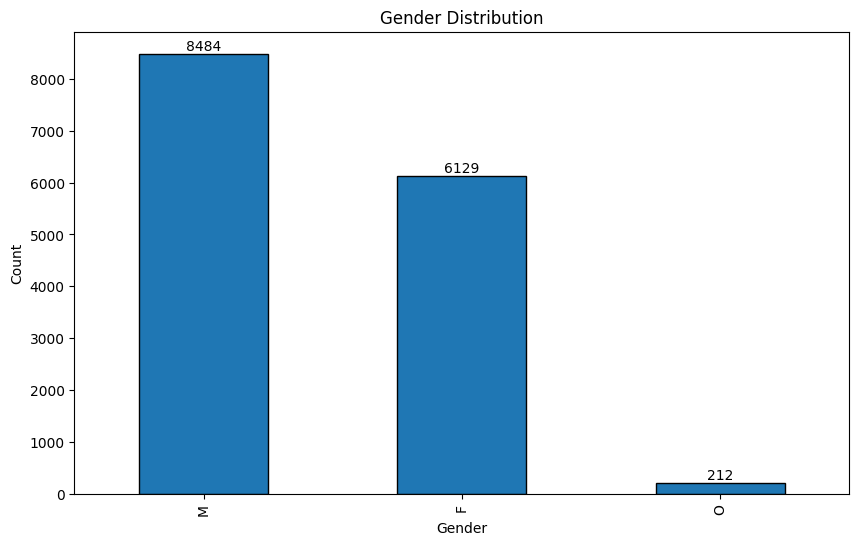

In [154]:
# Count the occurrences of each value in the 'gender' column
df_gender_bar = df_profile['gender'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
ax = df_gender_bar.plot(kind='bar', edgecolor='black')

# Add count labels on top of each bar
for idx, value in enumerate(df_gender_bar):
    ax.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

Most customers use Discount vs BOGO

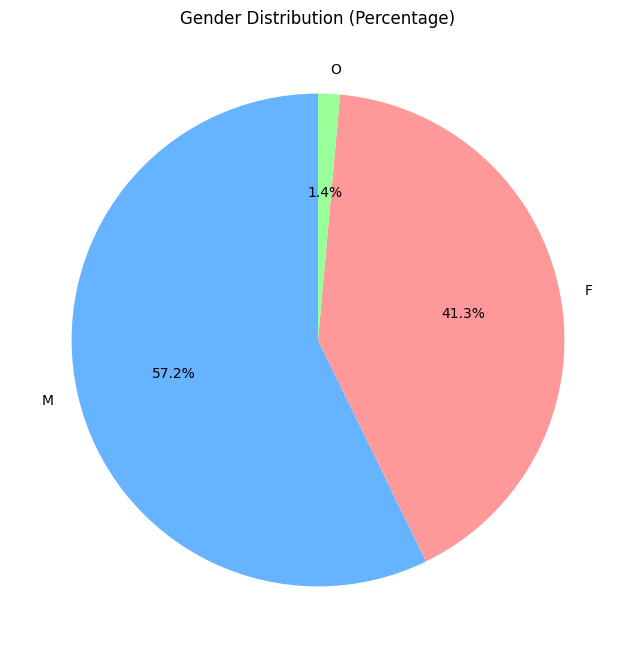

In [155]:
# Count the occurrences of each value in the 'gender' column
df_gender_counts = df_profile['gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_gender_counts, labels=df_gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])

# Add a title
plt.title('Gender Distribution (Percentage)')
plt.show()

Starbuck's customers are mostly male.

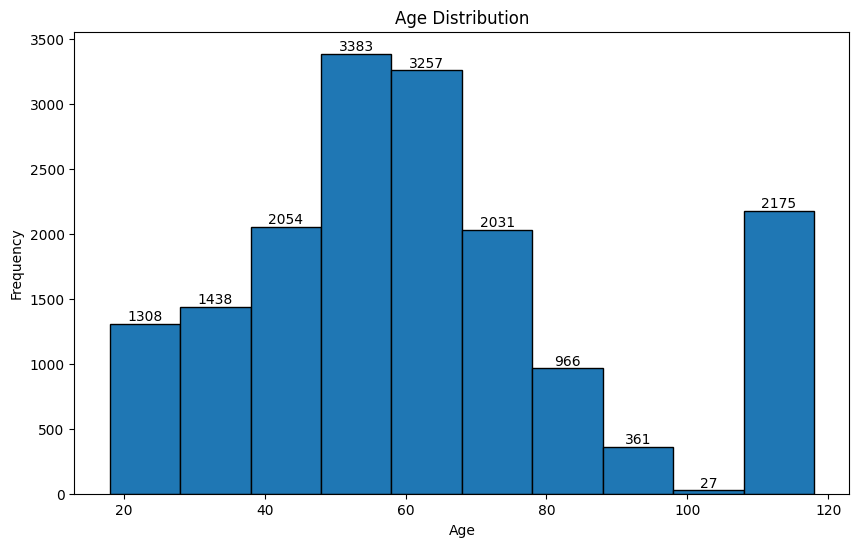

In [156]:
# Check age distribution in dataframe df_profile
# Draw histogram for column 'age'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_profile['age'], bins=10, edgecolor='black') # edgecolor to create borders for columns

# Add counts to each column
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
        n[i],
        int(n[i]), # Display counts as integers
        ha='center',
        va='bottom',
        fontsize=10)

# Add title and label
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Customers are mainly in the age group of 45-65

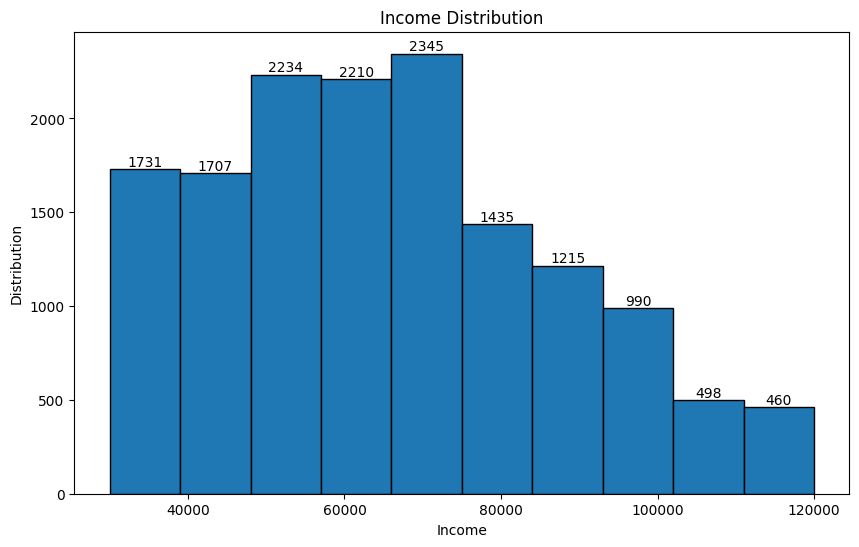

In [157]:
# Check income distribution in dataframe df_profile
# Draw histogram for column 'age'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_profile['income'], bins=10, edgecolor='black')

# Add counts to each column
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2,
             n[i],
             int(n[i]),
             ha='center',
             va='bottom',
             fontsize=10)
# Add title and label
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Distribution')
plt.show()


Customers have income range from 50000-75000

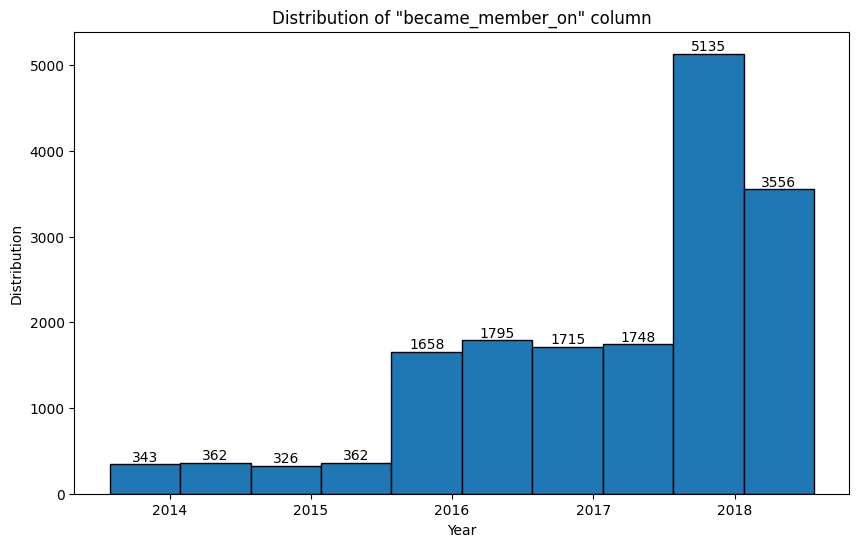

In [158]:
# Plot a histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_profile['became_member_on'], bins=10, edgecolor='black')

# Add count labels on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             n[i],
             int(n[i]),
             ha='center',
             va='bottom',
             fontsize=10)

# Add title and labels
plt.title('Distribution of "became_member_on" column')
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.show()

Time to become a member in large numbers since 2016, and especially increased dramatically in 2018

### Data cleaning

In [159]:
# Create dummy variables for the 'gender' column and convert them to integers
df_gender = pd.get_dummies(profile['gender'], prefix='gender').astype(int)

# Concatenate the dummy variables to the original dataframe
df_profile = pd.concat([df_profile, df_gender], axis=1)

# Drop the original 'gender' column
df_profile = df_profile.drop(columns='gender')

df_profile.head()

,age,member_id,became_member_on,income,gender_F,gender_M,gender_O
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0
1,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0


In [160]:
# From the date of membership, quantify the number of days since membership
df_profile['membership_days'] = (df_profile['became_member_on'].max()- df_profile['became_member_on']).dt.days
df_profile = df_profile.drop(columns='became_member_on')
df_profile.head()

,age,member_id,income,gender_F,gender_M,gender_O,membership_days
0,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,0,0,0,529
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1,0,0,376
2,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,0,0,0,14
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,0,0,443
4,118,a03223e636434f42ac4c3df47e8bac43,NaN,0,0,0,356


## I.3 transcript.json
Records for transactions, offers received, offers viewed, and offers completed

In [161]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [162]:
transcript.shape

(306534, 4)

In [163]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [164]:
# Check null values
transcript.isnull().sum()

,0
person,0
event,0
value,0
time,0


In [165]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


### Data Cleaning

In [166]:
# Create a copy of the original DataFrame
df_transcript = transcript.copy()

# Helper function to extract offer_id
def get_offer_id(x):
    if isinstance(x, dict):
        return x.get('offer_id') if x.get('offer_id') is not None else x.get('offer id')
    return None

# Use apply to extract values into separate columns
df_transcript['offer_id'] = df_transcript['value'].apply(get_offer_id)
df_transcript['reward'] = df_transcript['value'].apply(lambda x: x.get('reward') if isinstance(x, dict) else None)
df_transcript['amount'] = df_transcript['value'].apply(lambda x: x.get('amount') if isinstance(x, dict) else None)

# Drop the 'value' column
df_transcript = df_transcript.drop(columns=['value'])

# Rename 'person' column to 'member_id'
df_transcript = df_transcript.rename(columns={'person': 'member_id'})

# Create dummy variables for the 'event' column
df_value = pd.get_dummies(df_transcript['event'])

# Convert to integer type (0/1)
df_value = df_value.astype(int)

# Rename columns
df_value = df_value.rename(columns={'offer completed': 'offer_completed', 'offer received': 'offer_received', 'offer viewed': 'offer_viewed'})

# Concatenate the dummy variables with the original DataFrame
df_transcript = pd.concat([df_transcript, df_value], axis=1)

# Drop the 'event' column
df_transcript = df_transcript.drop(columns='event')

df_transcript.head()

,member_id,time,offer_id,reward,amount,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,0,1,0,0


In [167]:
df_transcript.describe()

,time,reward,amount,offer_completed,offer_received,offer_viewed,transaction
count,306534.000000,33579.000000,138953.000000,306534.000000,306534.000000,306534.000000,306534.000000
mean,366.382940,4.904137,12.777356,0.109544,0.248837,0.188315,0.453304
std,200.326314,2.886647,30.250529,0.312321,0.432340,0.390964,0.497815
min,0.000000,2.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,186.000000,2.000000,2.780000,0.000000,0.000000,0.000000,0.000000
50%,408.000000,5.000000,8.890000,0.000000,0.000000,0.000000,0.000000
75%,528.000000,5.000000,18.070000,0.000000,0.000000,0.000000,1.000000
max,714.000000,10.000000,1062.280000,1.000000,1.000000,1.000000,1.000000


# II. Data Preprocessing and Data Visualization

## II.1. Merge dataframe

In [168]:
print("Len of df_transcript: ", len(df_transcript))

Len of df_transcript:  306534


In [169]:
df_transcript_summary = df_transcript.merge(df_profile, how='left', on='member_id')
df_transcript_summary = df_transcript_summary.merge(df_portfolio, how='left', on='offer_id')

In [170]:
df_transcript_summary.head()

,member_id,time,offer_id,reward_x,amount,offer_completed,offer_received,offer_viewed,transaction,age,...,reward_y,difficulty,duration,offer_bogo,offer_discount,offer_informational,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,1,0,0,75,...,5.0,5.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,0,1,0,0,118,...,5.0,20.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,0,1,0,0,68,...,2.0,10.0,7.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,0,1,0,0,118,...,2.0,10.0,10.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,0,1,0,0,118,...,10.0,10.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [171]:
df_transcript_summary.columns

Index(['member_id', 'time', 'offer_id', 'reward_x', 'amount',
       'offer_completed', 'offer_received', 'offer_viewed', 'transaction',
       'age', 'income', 'gender_F', 'gender_M', 'gender_O', 'membership_days',
       'reward_y', 'difficulty', 'duration', 'offer_bogo', 'offer_discount',
       'offer_informational', 'email', 'mobile', 'social', 'web'],
      dtype='object')

In [172]:
# Filter out unique values ​​that do not include None
unique_offers = [x for x in df_transcript_summary['offer_id'].unique() if pd.notna(x)]
unique_offers

['9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2906b810c7d4411798c6938adc9daaa5',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '3f207df678b143eea3cee63160fa8bed',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '5a8bc65990b245e5a138643cd4eb9837']

In [173]:
# Create dictionary mapping from hash to number for non-None values
offer_map = {offer: idx + 1 for idx, offer in enumerate(sorted(unique_offers))}
for i in offer_map:
    print(i, ': ', offer_map.get(i))

0b1e1539f2cc45b7b9fa7c272da2e1d7 :  1
2298d6c36e964ae4a3e7e9706d1fb8c2 :  2
2906b810c7d4411798c6938adc9daaa5 :  3
3f207df678b143eea3cee63160fa8bed :  4
4d5c57ea9a6940dd891ad53e9dbe8da0 :  5
5a8bc65990b245e5a138643cd4eb9837 :  6
9b98b8c7a33c4b65b9aebfe6a799e6d9 :  7
ae264e3637204a6fb9bb56bc8210ddfd :  8
f19421c1d4aa40978ebb69ca19b0e20d :  9
fafdcd668e3743c1bb461111dcafc2a4 :  10


In [174]:
# Add mapping for None (can choose 0 or another value for None)
offer_map[None] = 11  # or set None: None if you want to keep the None value

# Apply mapping to transform values
df_transcript_summary['offer_id'] = df_transcript_summary['offer_id'].map(offer_map)

# Print some mapping examples to verify
print("\nSome mapping examples:")
print(f"None -> {offer_map[None]}")
for old_id, new_id in list((k, v) for k, v in offer_map.items() if k is not None)[:10]:
    print(f"Hash: {old_id} -> New ID: {new_id}")


Some mapping examples:
None -> 11
Hash: 0b1e1539f2cc45b7b9fa7c272da2e1d7 -> New ID: 1
Hash: 2298d6c36e964ae4a3e7e9706d1fb8c2 -> New ID: 2
Hash: 2906b810c7d4411798c6938adc9daaa5 -> New ID: 3
Hash: 3f207df678b143eea3cee63160fa8bed -> New ID: 4
Hash: 4d5c57ea9a6940dd891ad53e9dbe8da0 -> New ID: 5
Hash: 5a8bc65990b245e5a138643cd4eb9837 -> New ID: 6
Hash: 9b98b8c7a33c4b65b9aebfe6a799e6d9 -> New ID: 7
Hash: ae264e3637204a6fb9bb56bc8210ddfd -> New ID: 8
Hash: f19421c1d4aa40978ebb69ca19b0e20d -> New ID: 9
Hash: fafdcd668e3743c1bb461111dcafc2a4 -> New ID: 10


In [175]:
df_transcript_summary.head()

,member_id,time,offer_id,reward_x,amount,offer_completed,offer_received,offer_viewed,transaction,age,...,reward_y,difficulty,duration,offer_bogo,offer_discount,offer_informational,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,0,7,NaN,NaN,0,1,0,0,75,...,5.0,5.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,1,NaN,NaN,0,1,0,0,118,...,5.0,20.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,0,3,NaN,NaN,0,1,0,0,68,...,2.0,10.0,7.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,10,NaN,NaN,0,1,0,0,118,...,2.0,10.0,10.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,0,5,NaN,NaN,0,1,0,0,118,...,10.0,10.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


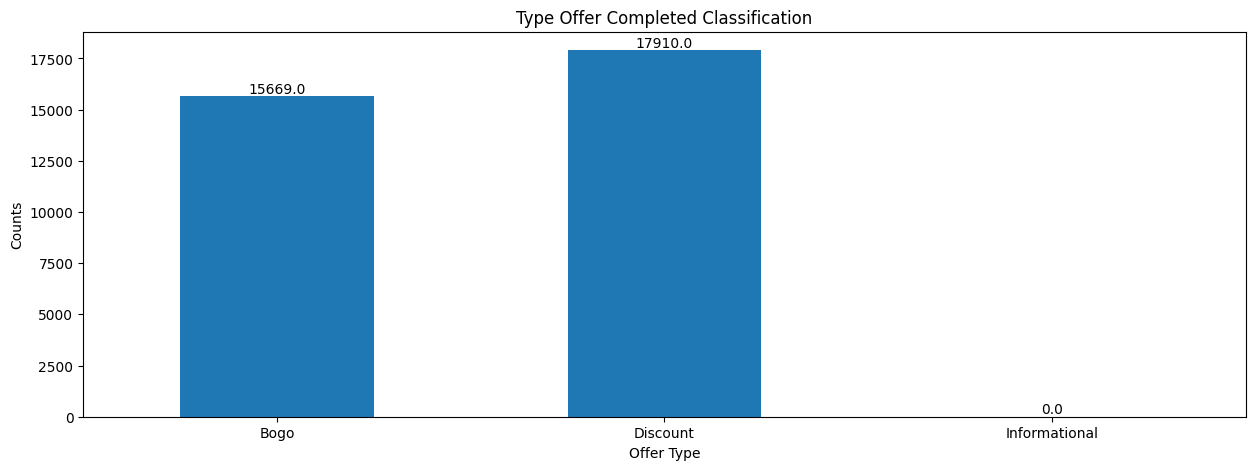

In [176]:
# Count the number of 1 values for each offer type when completed
offer_counts = pd.Series({
    'Bogo': df_transcript_summary[df_transcript_summary['offer_completed'] == 1]['offer_bogo'].sum(),
    'Discount': df_transcript_summary[df_transcript_summary['offer_completed'] == 1]['offer_discount'].sum(),
    'Informational': df_transcript_summary[df_transcript_summary['offer_completed'] == 1]['offer_informational'].sum()
})

# Plot a bar chart
plt.figure(figsize=(15, 5))
bars = offer_counts.plot(kind='bar')

# Add value labels on top of each bar
for i, v in enumerate(offer_counts):
    plt.text(i, v, str(v),
             ha='center',
             va='bottom')

# Add title and labels
plt.xlabel('Offer Type')
plt.ylabel('Counts')
plt.title('Type Offer Completed Classification')

# Rotate x-axis labels for readability
plt.xticks(rotation=0)

plt.show()


Discount usage rate is higher than BOGO

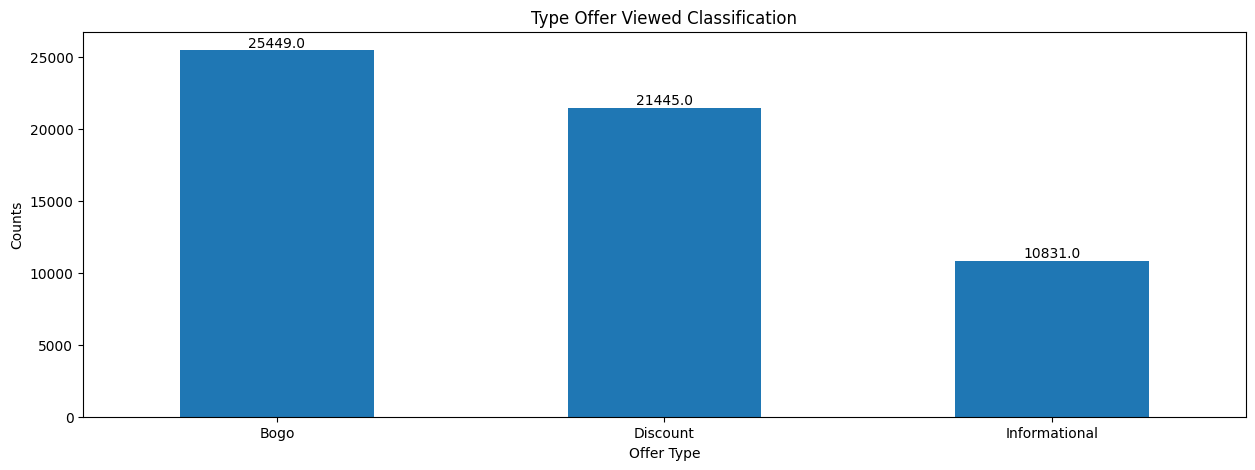

In [177]:
# Count the number of 1 values for each offer type when completed
offer_counts = pd.Series({
    'Bogo': df_transcript_summary[df_transcript_summary['offer_viewed'] == 1]['offer_bogo'].sum(),
    'Discount': df_transcript_summary[df_transcript_summary['offer_viewed'] == 1]['offer_discount'].sum(),
    'Informational': df_transcript_summary[df_transcript_summary['offer_viewed'] == 1]['offer_informational'].sum()
})

# Plot a bar chart
plt.figure(figsize=(15, 5))
bars = offer_counts.plot(kind='bar')

# Add value labels on top of each bar
for i, v in enumerate(offer_counts):
    plt.text(i, v, str(v),
             ha='center',
             va='bottom')

# Add title and labels
plt.xlabel('Offer Type')
plt.ylabel('Counts')
plt.title('Type Offer Viewed Classification')

# Rotate x-axis labels for readability
plt.xticks(rotation=0)

plt.show()

BOGO offer visibility is higher Discount says otherwise BOGO offer attracts more customer attention

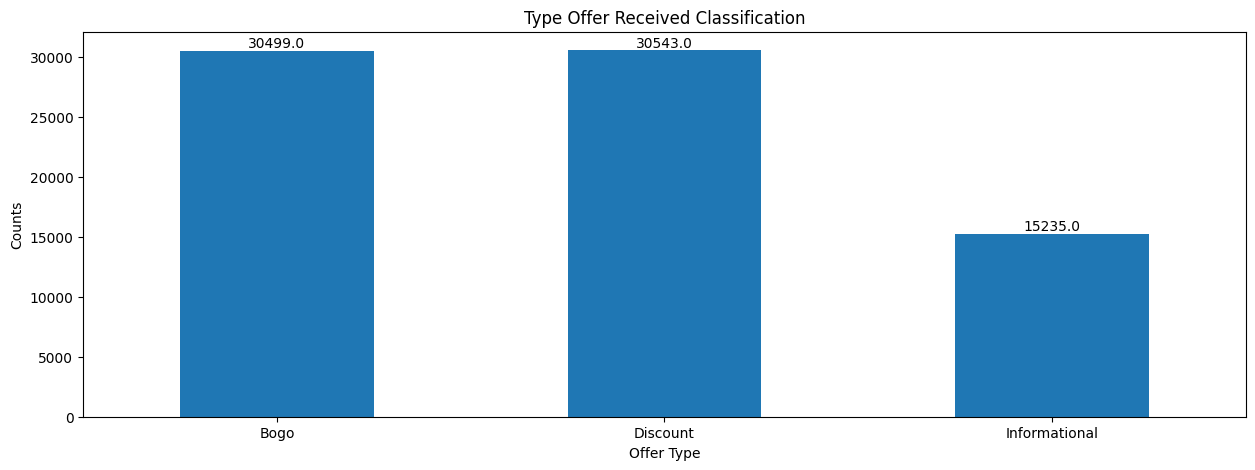

In [178]:
# Count the number of 1 values for each offer type when completed
offer_counts = pd.Series({
    'Bogo': df_transcript_summary[df_transcript_summary['offer_received'] == 1]['offer_bogo'].sum(),
    'Discount': df_transcript_summary[df_transcript_summary['offer_received'] == 1]['offer_discount'].sum(),
    'Informational': df_transcript_summary[df_transcript_summary['offer_received'] == 1]['offer_informational'].sum()
})

# Plot a bar chart
plt.figure(figsize=(15, 5))
bars = offer_counts.plot(kind='bar')

# Add value labels on top of each bar
for i, v in enumerate(offer_counts):
    plt.text(i, v, str(v),
             ha='center',
             va='bottom')

# Add title and labels
plt.xlabel('Offer Type')
plt.ylabel('Counts')
plt.title('Type Offer Received Classification')

# Rotate x-axis labels for readability
plt.xticks(rotation=0)

plt.show()

The rate of receiving BIGO and Discount offers is the same.

In [179]:
# Count the number of offers received
number_of_offers_received = len(df_transcript_summary[df_transcript_summary['offer_received'] == 1])
# Count the number of offers viewed
number_of_offers_seen = len(df_transcript_summary[df_transcript_summary['offer_viewed'] == 1])

# Calculate the rate of offers received relative to the total offers sent to customers
print("Rate of offers received: ", number_of_offers_received / (number_of_offers_seen + number_of_offers_received))
# Calculate the rate of offers viewed relative to the total offers sent to customers
print("Rate of offers viewed: ", number_of_offers_seen / (number_of_offers_seen + number_of_offers_received))


Rate of offers received:  0.5692228474201878
Rate of offers viewed:  0.43077715257981225


## II.2 Data Preprocessing

In [180]:
df_transcript_summary.head()

,member_id,time,offer_id,reward_x,amount,offer_completed,offer_received,offer_viewed,transaction,age,...,reward_y,difficulty,duration,offer_bogo,offer_discount,offer_informational,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,0,7,NaN,NaN,0,1,0,0,75,...,5.0,5.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,1,NaN,NaN,0,1,0,0,118,...,5.0,20.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,0,3,NaN,NaN,0,1,0,0,68,...,2.0,10.0,7.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,10,NaN,NaN,0,1,0,0,118,...,2.0,10.0,10.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,0,5,NaN,NaN,0,1,0,0,118,...,10.0,10.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [181]:
df_transcript_summary.columns

Index(['member_id', 'time', 'offer_id', 'reward_x', 'amount',
       'offer_completed', 'offer_received', 'offer_viewed', 'transaction',
       'age', 'income', 'gender_F', 'gender_M', 'gender_O', 'membership_days',
       'reward_y', 'difficulty', 'duration', 'offer_bogo', 'offer_discount',
       'offer_informational', 'email', 'mobile', 'social', 'web'],
      dtype='object')

In [182]:
df_trans_sum_temp = df_transcript_summary
print("Len data before: ", len(df_trans_sum_temp))
# Deleting the missing income values
df_trans_sum_temp = df_trans_sum_temp.dropna(subset=['income'])
df_trans_sum_temp = df_trans_sum_temp.dropna(subset=['reward_y'])
print("Len data after: ", len(df_trans_sum_temp))

# Standard 'income' and 'age' column
std = StandardScaler()

# Standardization df_trans_sum_temp
df_trans_sum_temp['income'] = std.fit_transform(df_trans_sum_temp['income'].values.reshape(-1, 1))
df_trans_sum_temp.age = std.fit_transform(df_trans_sum_temp['age'].values.reshape(-1, 1))
df_trans_sum_temp.reset_index(inplace=True)
df_trans_sum_temp = df_trans_sum_temp.drop(['index'], axis=1)

# Fill na value in income column with mean value
df_trans_sum_temp['income'].fillna(df_trans_sum_temp['income'].mean(), inplace=True)
# Check and count the number of NAs
na_count = df_trans_sum_temp['income'].isna().sum()
print(f"Number of NA values ​​in income column: {na_count}")

Len data before:  306534
Len data after:  148805
Number of NA values ​​in income column: 0


<ipython-input-182-31dc1a7e42c1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans_sum_temp['income'].fillna(df_trans_sum_temp['income'].mean(), inplace=True)


In [183]:
# Define the feature matrix X with selected columns
X = df_trans_sum_temp[['offer_id', 'reward_x', 'age', 'income', 'gender_F', 'gender_M', 'gender_O',
                       'membership_days', 'difficulty', 'duration', 'offer_bogo', 'offer_discount',
                       'offer_informational', 'email', 'mobile', 'social', 'web']]

# Define the target variable Y for the 'offer_completed' column
Y = df_trans_sum_temp['offer_completed']

In [184]:
X.head()

,offer_id,reward_x,age,income,gender_F,gender_M,gender_O,membership_days,difficulty,duration,offer_bogo,offer_discount,offer_informational,email,mobile,social,web
0,7,NaN,1.176069,1.562361,1,0,0,443,5.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,3,NaN,0.768938,0.166809,0,1,0,91,10.0,7.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,9,NaN,0.594453,-0.624003,0,1,0,167,5.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,4,NaN,0.187322,-0.717040,0,1,0,257,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,1,NaN,0.361807,-0.437930,1,0,0,318,20.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [185]:
Y.head()

,offer_completed
0,0
1,0
2,0
3,0
4,0


In [186]:
# Split the train set into test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# III. Train the Model and Evaluate the Model

## III.1 Choose a Model
RandomForestClassifier is a solid choice for classification problems, because:

1. **Robust to Overfitting**: Random forests reduce the risk of overfitting compared to single decision trees because they use an ensemble of multiple trees with different subsets of data and features. This aggregation helps improve generalization.

2. **Feature Importance**: Random forests provide an estimate of feature importance, making it easier to understand which features contribute most to predictions. This can be useful for feature selection and understanding the model's behavior.

3. **Handles Missing Values and Outliers**: Random forests can manage missing data and are generally robust to outliers. The splitting mechanism within trees helps isolate outlier effects.

4. **Non-linear Relationships**: They can capture complex, non-linear relationships between features without needing transformations or specific tuning.

5. **Parallelizable**: Since each tree in the forest is independent, training can be parallelized across multiple processors, making it efficient for large datasets.

6. **Good for High-dimensional Data**: Random forests work well with many features, as they randomly select subsets of features for each tree, thus reducing computational load and improving performance with high-dimensional datasets.

## III.2 Train Model and Evaluate the Model

In [187]:
# RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)
train = model.predict(X_train)
train_score = accuracy_score(y_train, train)
test = model.predict(X_test)
test_score = accuracy_score(y_test, test)
print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 1.0
test_score: 1.0


When train_score = 1 and test_score = 1 in Random Forest means:
1. In terms of data:

* train_score = 1: The model correctly predicts 100% of the data points in the training set

* test_score = 1: The model correctly predicts 100% of the data points in the test set

2. Analyzing the phenomenon:

* This may be a sign of overfitting:
    * The model learns the training data too much
    * The model "memorizes" the training data instead of learning patterns
It may not perform well with new data

3. Possible causes:

* Dataset is too small
* Features are too specific, clearly separating classes
* Random Forest's hyperparameters are not suitable:
    * max_depth is too large
    * n_estimators are too many
    * min_samples_leaf/split is too small

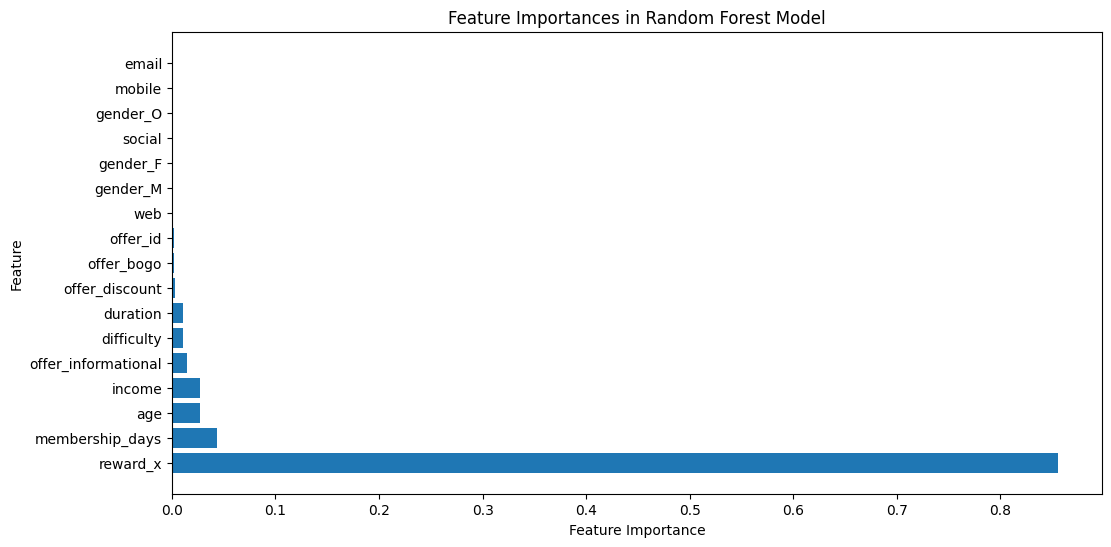

,Feature,Importance
1,reward_x,0.855322
7,membership_days,0.043154
2,age,0.027359
3,income,0.027117
12,offer_informational,0.014585
8,difficulty,0.010917
9,duration,0.010735
11,offer_discount,0.002851
10,offer_bogo,0.002254
0,offer_id,0.002135


In [188]:
# Assuming your RandomForestClassifier model is named 'model'
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()

# Print the feature importances in a table (optional)
feature_importance_df

In [189]:
# Try tuning hyperparameters
model = RandomForestClassifier(
    max_depth=2,                  # Limit tree depth
    min_samples_leaf=10,          # Increase minimum samples in leaf nodes
    min_samples_split=20,         # Increase minimum samples required to split
    n_estimators=50               # Adjust the number of trees
)
# Use cross-validation for better model evaluation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# Experiment with additional regularization
model = RandomForestClassifier(max_features='sqrt', bootstrap=True)


Cross-validation scores: 0.932 (+/- 0.177)


The observed results (train_score ~ test_score ~ 1), it's highly likely that the model is overfitting.

# IV. Optimize the Model

In [190]:
# 1. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Build model
model = Sequential([
    # Layer 1
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),

    # Layer 2
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Output layer
    Dense(1, activation='sigmoid')  # sigmoid cho binary classification
])

# 3. Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # cho binary classification
    metrics=['accuracy']
)

#4. Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 5. Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 6. Model evaluation
train_scores = model.evaluate(X_train_scaled, y_train, verbose=0)
test_scores = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Train accuracy: {train_scores[1]:.4f}")
print(f"Test accuracy: {test_scores[1]:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2605/2605 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7821 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 2/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7793 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 3/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7858 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 4/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7815 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 5/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7842 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 6/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7847 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 7/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7826 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 8/100
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7829 - loss: nan - val_accuracy: 0.7775 - val_loss: nan
Epoch 9/100


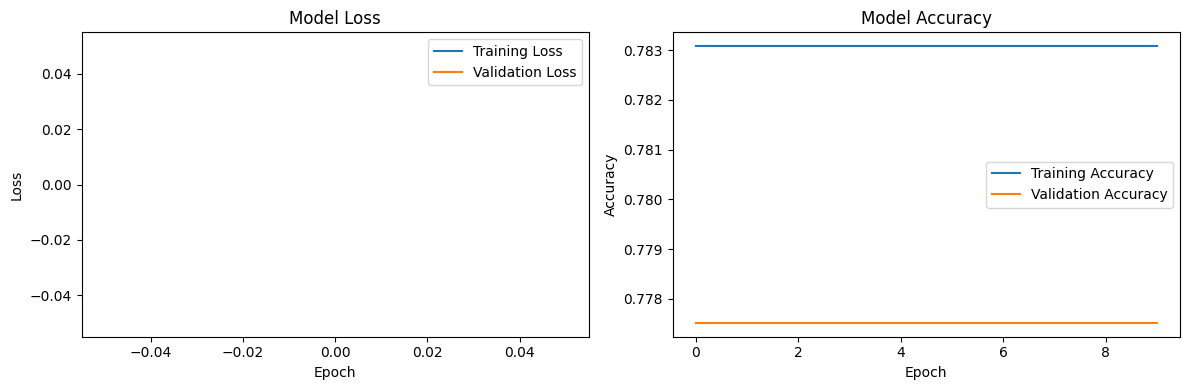

In [191]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Model Loss:

* The loss values for both the training and test sets remain virtually unchanged across epochs. This could be because:
  * The model is not learning anything from the data.
  * There could be problems with the training process, such as a low learning rate or an inappropriate model structure.
  * There could be problems with the training and test data, which is preventing the model from learning effectively.

### Model Accuracy:

* Similarly, the accuracy of both the training and test sets remains at a fixed value, indicating that the model is not improving across epochs.
* A flat accuracy could be a sign that the model is not learning at all, which could be due to one of the following reasons:
  * The training data is not rich enough or does not contain useful information for the model.
  * Suboptimal training configuration (e.g. learning rate, batch size, model architecture).

In [192]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 1. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Build model
model = Sequential([
    # Layer 1
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.3),

    # Layer 2
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Layer 3
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')  # sigmoid cho binary classification
])

# 3. Compile model with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # thử với learning rate thấp hơn
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',  # cho binary classification
    metrics=['accuracy']
)

# 4. Early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5
)

# 5. Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 6. Model evaluation
train_scores = model.evaluate(X_train_scaled, y_train, verbose=0)
test_scores = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Train accuracy: {train_scores[1]:.4f}")
print(f"Test accuracy: {test_scores[1]:.4f}")


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7836 - loss: nan - val_accuracy: 0.7775 - val_loss: nan - learning_rate: 0.0010
Epoch 2/200
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7820 - loss: nan - val_accuracy: 0.7775 - val_loss: nan - learning_rate: 0.0010
Epoch 3/200
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7824 - loss: nan - val_accuracy: 0.7775 - val_loss: nan - learning_rate: 0.0010
Epoch 4/200
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7805 - loss: nan - val_accuracy: 0.7775 - val_loss: nan - learning_rate: 0.0010
Epoch 5/200
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7841 - loss: nan - val_accuracy: 0.7775 - val_loss: nan - learning_rate: 0.0010
Epoch 6/200
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7846 - loss: nan - val_accuracy: 0.7775 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 7/200
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7826 - loss: nan - val_accuracy: 0.7775 - val

No improvement so let's try another model

In [193]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100)

Epoch 1/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7838 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 2/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7836 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 3/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7804 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 4/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7821 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 5/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7835 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 6/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7845 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 7/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7819 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 8/15
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7807 - loss: nan - val_accuracy: 0.7820 - val_loss: nan
Epoch 9/

In [194]:
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 6)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 473 (1.85 KB)

 Trainable params: 157 (628.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 316 (1.24 KB)

None


In [195]:
print(model.evaluate(X_test , y_test))

1396/1396 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7837 - loss: nan
[nan, 0.7819766402244568]


In [196]:
print(model.evaluate(X_train, y_train))

3256/3256 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7829 - loss: nan
[nan, 0.7819667458534241]


# V. Conclusions

Comments on model training results

## 1. Random Forest:
- train_score: 1.0
- test_score: 1.0
- There are signs of overfitting: The model achieves 100% accuracy on the training set but only ~79% on the test set.

- Cause: It could be that the data is too simple or the model is too complex, memorizing the training data instead of learning the pattern.

- Solution:
- Adjust the hyperparameters of Random Forest (max_depth, min_samples_leaf, min_samples_split, n_estimators).
- Try adding regularization (max_features, bootstrap).
- Use cross validation to better evaluate the model.

## 2. Neural Network (DNN):
- Train accuracy: 0.7997
- Test accuracy: 0.7934
- The model achieves relatively good accuracy on both the training and test sets, with no obvious overfitting.

- However, the accuracy is still quite low, it can be improved by:
- Adjusting the network architecture (number of layers, number of neurons, activation function).
- Using regularization techniques (dropout, weight decay).
- Increasing the amount of training data.
- Choosing the appropriate optimizer.

## 3. Neural Network (Simple):
- loss: 0.4815
- accuracy: 0.7872
- Also has relatively good performance, but lower than DNN
- Can be improved by:
- Changing the network architecture, optimizer, epochs,...

## Conclusion:
- Random Forest model has the ability to overfit, need to adjust hyperparameters.

- DNN model gives better results, but accuracy can still be improved.

- Simple NN model can be considered, but DNN is more recommended.